In [26]:
# loading in the dataset 

import pandas as pd
from sklearn.preprocessing import LabelEncoder

shomolu = pd.read_csv('mainDataset.csv')
shomolu.head()   # check the pandas groupby function see waht u can do with the streets and drainage

,Street,Gender,Age,Marital_Status,Education,Religion,Nationality,Residence,Not_Residence,Education_Level,...,Motor_Park,Health_Institution,Health_Institution_Functionality,Most_Used_Health_Instituition,Housing_Condition,Settlement_Pattern,Number_Of_Houses,Security_Present,Effectiveness_Of_Security,Social_Vices
0,solanke str,female,over 50,married,secondary,christianity,Nigerian,yes,NaN,SSS/Sec/TTC,...,no,health center,fair,private hospital,poor,nucleated,5 and above,local vigilante,effective,NaN
1,ibukunoluwa str,male,21 - 30,single,secondary,christianity,Nigerian,yes,NaN,SSS/Sec/TTC,...,yes,clinic,functioning,private hospital,very good,nucleated,5 and above,police,effective,NaN
2,awolaja str,male,41 - 50,married,Tetiary,islam,Nigerian,No,NaN,University Graduate/HND,...,yes,dispensary,fair,public/government hospital,fair,nucleated,5 and above,police,effective,deliquency
3,Alonge str,male,31 - 40,NaN,Tetiary,christianity,Nigerian,yes,NaN,University Graduate/HND,...,yes,dispensary,fair,public/government hospital,fair,nucleated,5 and above,police,effective,deliquency
4,Mafowokun str,female,31 - 40,married,Tetiary,christianity,Nigerian,yes,NaN,University Graduate/HND,...,yes,dispensary,fair,private hospital,fair,nucleated,5 and above,police,effective,deliquency


In [2]:
shomolu.columns    #list out all the columns

Index(['Street', 'Gender', 'Age', 'Marital_Status', 'Education', 'Religion',
       'Nationality', 'Residence', 'Not_Residence', 'Education_Level',
       'Employment_Type', 'Occupation', 'Household_Income_Per_Month',
       'No_Of_Cars_Per_Household', 'Work', 'No_Persons_Per_Household',
       'No_Of_Employed_Per_Household', 'Mode_Of_Transportation',
       'Tenancy_Type', 'Rent_Per_Month', 'Pay_Tax', 'If_Yes_How', 'Tax_Rate',
       'Markets', 'Economic_Base', 'Source_Of_Attraction',
       'Education_Facillity', 'If_Yes_Which', 'Physical_Condition',
       'How_Far_Is_It', 'Water_Supply', 'Electricity', 'PPDAY', 'Drainage',
       'Drainage_Condition', 'Refuse_Condition', 'Garbage_Disposal',
       'GARDOPEN', 'Nursery', 'Secondary_School', 'Shopping_Mall',
       'Fire_Station', 'Police_Post', 'Civic_Center', 'Bank_Services',
       'Post_Offices', 'Telephone_Mast', 'Others', 'REFAC', 'MAJORUSE',
       'Motor_Park', 'Health_Institution', 'Health_Institution_Functionality',
       

In [3]:
# loading the socio-economic characteriistics dataset to dataframe

sxtics = pd.read_csv('socioeconomics.csv')
sxtics.head()

,Gender,Age,Marital_Status,Education,Household_Income_Per_Month,Occupation,Rent_Per_Month,Tenancy_Type,Mode_Of_Transportation
0,female,over 50,married,secondary,20000 and below,Trading and commerce,5001 - 10000,Rented,Foot
1,male,21 - 30,single,secondary,20000 and below,Trading and commerce,5001 - 10000,Rented,public transport
2,male,41 - 50,married,Tetiary,80001 - 100000,Trading and commerce,5001 - 10000,Rented,public transport
3,male,31 - 40,NaN,Tetiary,80001 - 100000,Trading and commerce,5001 - 10000,Rented,public transport
4,female,31 - 40,married,Tetiary,80001 - 100000,Trading and commerce,Below 5000,Rented,public transport


## Running a quick value count on all the Indicators from the above table

In [88]:
sxtics.Occupation.value_counts(normalize=True)*100 # checking the percentage distribution of occupation distribution in shomolu

Trading and commerce    60.509554
artisan?                12.101911
Others                  10.191083
industrial worker        7.643312
civil service            7.006369
retired                  1.910828
8                        0.636943
Name: Occupation, dtype: float64

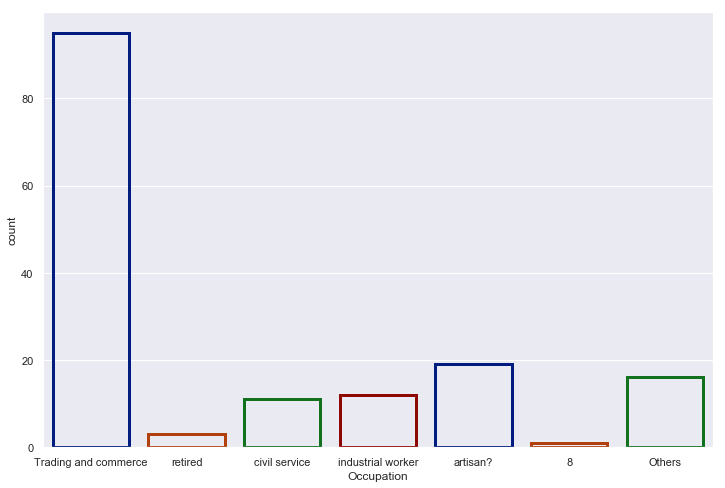

In [37]:
# visualizing the above cell. 
plt.subplots(figsize=(12,8))
viz = sns.countplot(x= 'Occupation', data = sxtics, facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette('dark', 4), linewidth=3)

In [89]:
sxtics.Rent_Per_Month.value_counts(normalize=True)*100  # checking the value counts of unique housing rental values

5001 - 10000     39.735099
Below 5000       22.516556
20001 - 30000    14.569536
above 30000      12.582781
10001 - 20000    10.596026
Name: Rent_Per_Month, dtype: float64

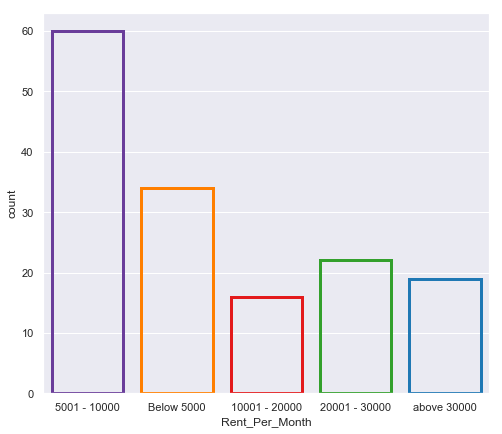

In [80]:
plt.subplots(figsize=(8,7))   #  visualizing the table above
viz = sns.countplot(x= 'Rent_Per_Month', data = sxtics, facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette('Paired_r', 5), linewidth=3)

In [82]:
sxtics.Household_Income_Per_Month.value_counts(normalize=True)  # there's a tie between 20-40k and below 20k
#sxtics.Household_Income_Per_Month.isnull().value_counts() 

20000 and below    0.276730
20001 - 40000      0.276730
40001 - 60000      0.150943
Above 100000       0.125786
80001 - 100000     0.094340
60001 - 80000      0.075472
Name: Household_Income_Per_Month, dtype: float64

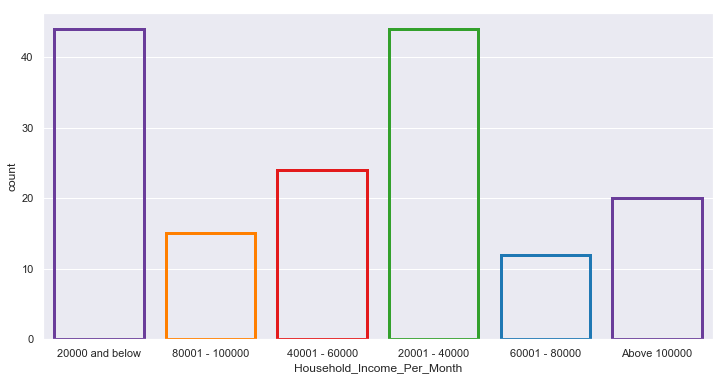

In [84]:
# trying to see the relationship between occupation and household  Income
plt.subplots(figsize=(12,6))
viz = sns.countplot(x= 'Household_Income_Per_Month', data = sxtics, facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette('Paired_r', 5), linewidth=3)

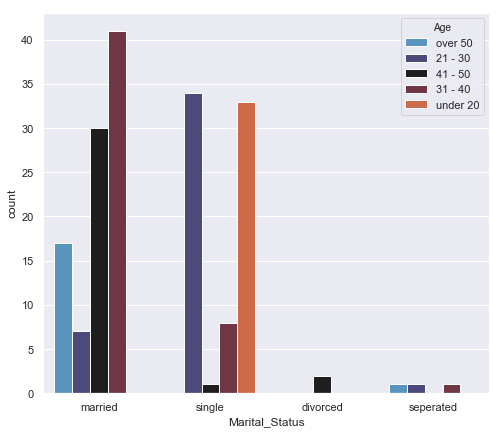

In [85]:
import seaborn as sns   # Python's library for visualizing
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

# increase the size of the figure
plt.subplots(figsize=(8,7))

#viz = sns.countplot(x= 'Marital_Status', data = sxtics, facecolor=(0,0,0,0),
#                   edgecolor=sns.color_palette('dark', 4), linewidth=5)

viz = sns.countplot(x= 'Marital_Status', data=sxtics, hue='Age', 
                 palette='icefire')

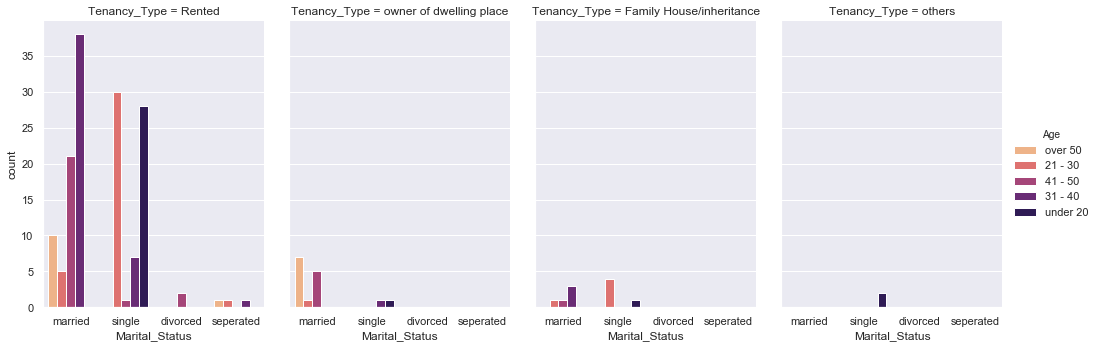

In [86]:
#testing with facetgrid catplot
#plt.subplots(figsize=(8,7))
sns.catplot(x='Marital_Status', hue='Age', col='Tenancy_Type', data=sxtics, 
            kind='count', height=5, aspect=.7, palette='magma_r')


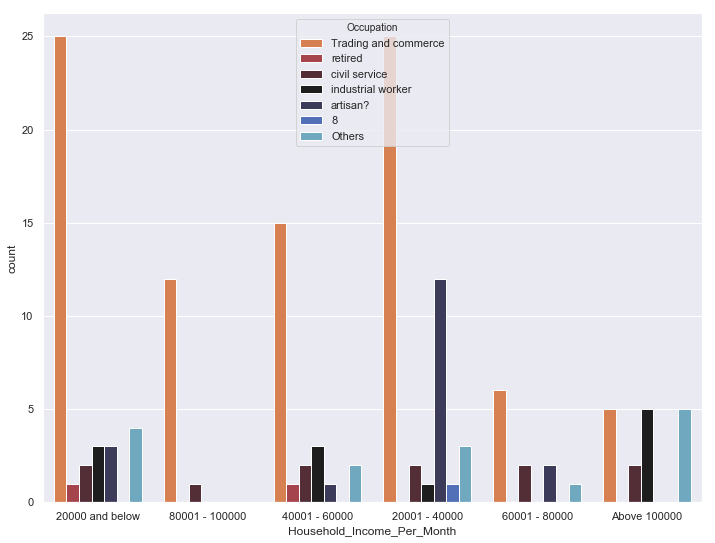

In [87]:
#  plotting to see the relationship between household income, and Occupation 
plt.subplots(figsize=(11.81, 9))
vizmultiple = sns.countplot(x= 'Household_Income_Per_Month', data=sxtics, hue='Occupation',
                 palette='icefire_r')

In [4]:
sxtics.Age.value_counts()  # percentages of ages
#sxtics.Age.isnull().value_counts()      # missing values
#gedm = sxtics.dropna()
#ecode 

31 - 40     52
21 - 30     42
under 20    34
41 - 50     33
over 50     18
Name: Age, dtype: int64

In [5]:
# ignore color maps to test

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [6]:
sxtics.Marital_Status.value_counts()  # percentages of marriages
sxtics.Marital_Status.isnull().value_counts() # missing rows in the mariage column

False    178
True       3
Name: Marital_Status, dtype: int64

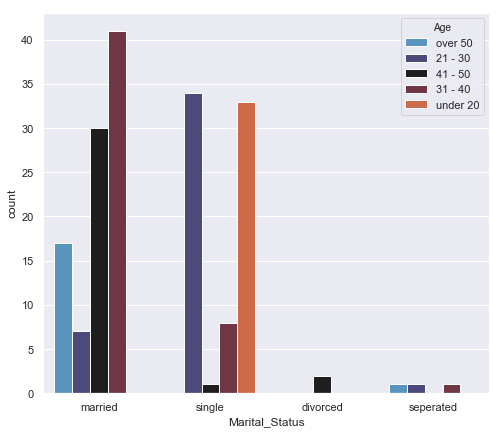

In [28]:
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

# increase the size of the figure
plt.subplots(figsize=(8,7))

#viz = sns.countplot(x= 'Marital_Status', data = sxtics, facecolor=(0,0,0,0),
#                   edgecolor=sns.color_palette('dark', 4), linewidth=5)

viz = sns.countplot(x= 'Marital_Status', data=sxtics, hue='Age',
                 palette='icefire')

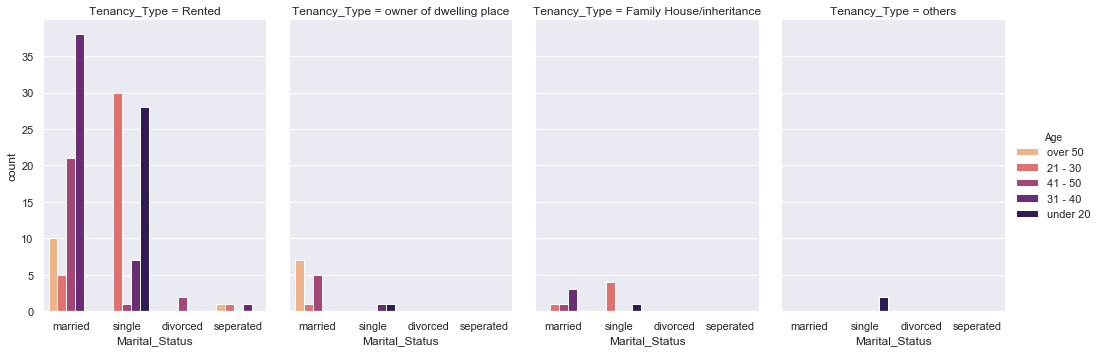

In [8]:
#testing with facetgrid catplot
#plt.subplots(figsize=(8,7))
sns.catplot(x='Marital_Status', hue='Age', col='Tenancy_Type', data=sxtics, 
            kind='count', height=5, aspect=.7, palette='magma_r')


In [9]:
sxtics.Education.value_counts()    # change the education to eduactional background
#sxtics.Education.isnull().value_counts()        # number of missing columns

Tetiary      83
secondary    79
primary      12
others        6
Name: Education, dtype: int64

In [10]:
sxtics.Household_Income_Per_Month.value_counts()  # there's a tie between 20-40k and nelow 20k
#sxtics.Household_Income_Per_Month.isnull().value_counts() 

20000 and below    44
20001 - 40000      44
40001 - 60000      24
Above 100000       20
80001 - 100000     15
60001 - 80000      12
Name: Household_Income_Per_Month, dtype: int64

In [27]:
sxtics.Occupation.value_counts(normalize=True)   # u should add in the writeup that random sampling was adopted
#sxtics.Occupation.isnull().value_counts()

Trading and commerce    0.605096
artisan?                0.121019
Others                  0.101911
industrial worker       0.076433
civil service           0.070064
retired                 0.019108
8                       0.006369
Name: Occupation, dtype: float64

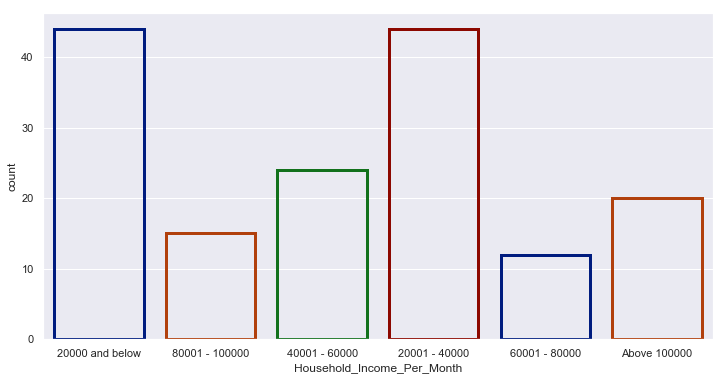

In [12]:
# trying to see the relationship between occupation and household  Income
plt.subplots(figsize=(12,6))
viz = sns.countplot(x= 'Household_Income_Per_Month', data = sxtics, facecolor=(0,0,0,0),
                   edgecolor=sns.color_palette('dark', 4), linewidth=3)

In [13]:
# ignore color maps to test

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

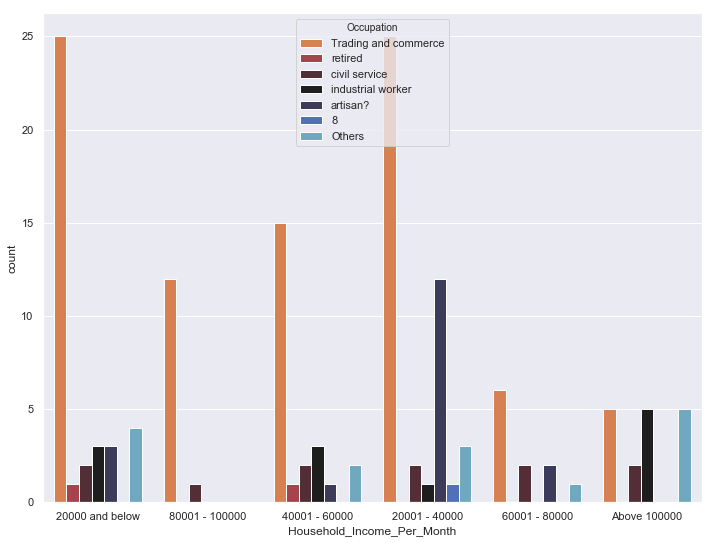

In [14]:

plt.subplots(figsize=(11.81, 9))
vizmultiple = sns.countplot(x= 'Household_Income_Per_Month', data=sxtics, hue='Occupation',
                 palette='icefire_r')

In [15]:
sxtics.Rent_Per_Month.value_counts()  # add that these info's are rather boring like this. would be more interesting in visualisations
#sxtics.Rent_Per_Month.isnull().value_counts()

5001 - 10000     60
Below 5000       34
20001 - 30000    22
above 30000      19
10001 - 20000    16
Name: Rent_Per_Month, dtype: int64

In [16]:
sxtics.Tenancy_Type.value_counts()  # obviously a greater part of the population would be on rent
#sxtics.Tenancy_Type.isnull().value_counts()      

Rented                      147
owner of dwelling place      17
Family House/inheritance     10
others                        2
Name: Tenancy_Type, dtype: int64

In [17]:
sxtics.Mode_Of_Transportation.value_counts() 
#sxtics.Mode_Of_Transportation.isnull().value_counts()   

public transport    128
private vehicle      42
Foot                  2
Tricycle              1
moterbike/okada       1
Others                1
Name: Mode_Of_Transportation, dtype: int64

In [21]:
sxtics.head()

,Gender,Age,Marital_Status,Education,Household_Income_Per_Month,Occupation,Rent_Per_Month,Tenancy_Type,Mode_Of_Transportation
0,female,over 50,married,secondary,20000 and below,Trading and commerce,5001 - 10000,Rented,Foot
1,male,21 - 30,single,secondary,20000 and below,Trading and commerce,5001 - 10000,Rented,public transport
2,male,41 - 50,married,Tetiary,80001 - 100000,Trading and commerce,5001 - 10000,Rented,public transport
3,male,31 - 40,NaN,Tetiary,80001 - 100000,Trading and commerce,5001 - 10000,Rented,public transport
4,female,31 - 40,married,Tetiary,80001 - 100000,Trading and commerce,Below 5000,Rented,public transport


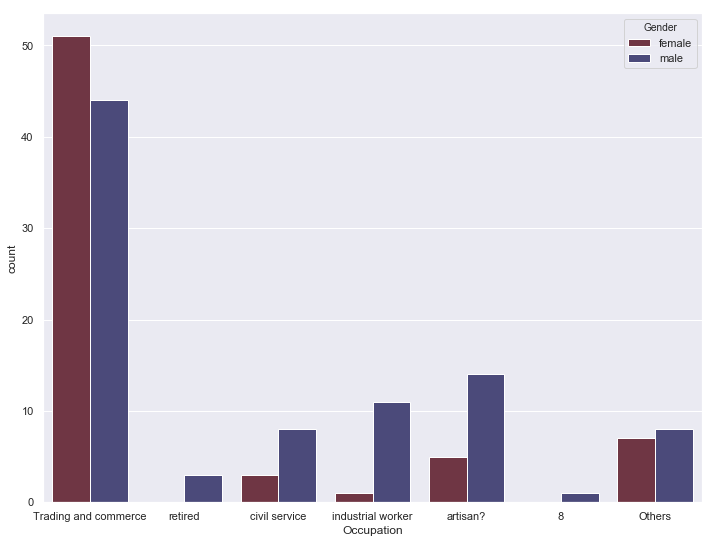

In [23]:
# check the relationship between gender and occupation


plt.subplots(figsize=(11.81, 9))
vizmultiple = sns.countplot(x= 'Occupation', data=sxtics, hue='Gender',
                 palette='icefire_r')